# Felipe Cardona - Tarea 3 Clasificación De Datos Utilizando Imágenes

## Configurar e Importar dependencias necesarias.

In [5]:
pip install -r requirements.txt

  Using cached tensorflow-2.17.1-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 4.2 MB/s eta 0:00:03
   -------------- ------------------------- 3.9/11.0 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 22.4 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 20.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/382.4 MB ? eta -:--:--
   - -------------------------------------- 13.4/382.4 MB 70.1 MB/s eta 0:00:06
   -- ------------------------------------- 24.6/382.4 MB 60.0 MB/s eta 0:00:06
   -- ------------------------------------- 28.6/382.4 MB 60.5 MB/s eta 0:00:06
   -- ------------------------------------- 28.6/382.4 MB 60.5 MB/s eta 0:00:06
   -- ------------------------------------- 28.6/382.4 MB 60.5 MB/s eta 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import os
import glob
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

## Cargar las imagenes para entrenamiento

Al momento de cargar nos encargaremos de eliminar todas aquellas imagenes corruptas que no sean posible de leer y tambien de normalizar las imagenes.

In [16]:
trainPath = 'data/train'
# Defino las dimensiones de las imágenes para estandarizar el procesamiento
IMG_SIZE_LR = 64  # Tamaño reducido para el modelo de regresión logística
IMG_SIZE_CNN = 128      # Tamaño para el modelo CNN

# Mapeo de etiquetas para corrección de nombres
labelMapping = {
    "Shepherds Purse": "Shepherd’s Purse",
}
def loadImages(path, imgSize=IMG_SIZE_LR, grayscale=False):
    """
    Carga y procesa las imágenes desde el directorio especificado.
    Parámetros:
    - path (str): Ruta de la carpeta de imágenes.
    - imgSize (int): Tamaño al que se redimensionarán las imágenes.
    - grayscale (bool): Si es True, carga las imágenes en escala de grises. Por defecto es False (color).
    
    Retorna:
    - images (np.array): Arreglo de imágenes procesadas.
    - labels (np.array): Arreglo de etiquetas correspondientes.
    """
    images = []
    labels = []
    for folder in os.listdir(path):
        label = labelMapping.get(folder, folder)  # Usar el mapeo de etiquetas si está definido
        folderPath = os.path.join(path, folder)
        if not os.path.isdir(folderPath):
            continue
        for file in glob.glob(os.path.join(folderPath, "*.png")):
            img = cv2.imread(file, cv2.IMREAD_GRAYSCALE if grayscale else cv2.IMREAD_COLOR)
            if img is None:
                print(f"Error al cargar la imagen: {file}")
                continue
            img = cv2.resize(img, (imgSize, imgSize))
            img = img / 255.0
            images.append(img)
            labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    if grayscale:
        images = images.reshape(-1, imgSize, imgSize, 1) # Ajustar la dimensión del canal para imágenes en escala de grises
    return images, labels

### Pasaremos a codificar etiquetas y dividir los datos los datos en entrenamiento y validación

In [17]:
X, y = loadImages(trainPath,IMG_SIZE_LR,True) # Cargar imágenes y etiquetas para el modelo de regresión logística

# Codificar las etiquetas
labelEncoder = LabelEncoder()
yEncoded = labelEncoder.fit_transform(y)
yEncoded = to_categorical(yEncoded)

# Dividir en conjuntos de entrenamiento y validación
XTrain, XVal, yTrain, yVal = train_test_split(X, yEncoded, test_size=0.2, random_state=42)

### Pasaremos a realizar ajustes y a entrenar el modelo de Regresión Logistica

In [7]:
# Aplanar las imágenes
XTrainFlat = XTrain.reshape(XTrain.shape[0], -1)
XValFlat = XVal.reshape(XVal.shape[0], -1)

In [8]:
from sklearn.pipeline import make_pipeline

# Crear el modelo de regresión logística con un pipeline
logisticModel = make_pipeline(
    LogisticRegression(max_iter=1500, solver='lbfgs', C=1)
)

logisticModel.fit(XTrainFlat, yTrain.argmax(axis=1))

Pipeline(steps=[('logisticregression', LogisticRegression(C=1, max_iter=1500))])

### Realizando predicciones con los datos de entrenamiento conseguimos los siguientes resultados

In [10]:
# Evaluar el modelo de Regresión Logística
yValPred = logisticModel.predict(XValFlat)
accuracy = accuracy_score(yVal.argmax(axis=1), yValPred)
confMatrix = confusion_matrix(yVal.argmax(axis=1), yValPred)

print("Precisión del modelo de Regresión Logística:", accuracy)
print("Matriz de Confusión:\n", confMatrix)

Precisión del modelo de Regresión Logística: 0.13123844731977818
Matriz de Confusión:
 [[ 4  4  2  9  0  8 12  1  5  0  8  3  0  0  0  3]
 [ 0  8  2 16  3  5  9  1 17  4 17  5  0  0  0  0]
 [ 0  6  2  8  1  3  9  0 12  6  8  2  0  0  0  0]
 [ 3  6  3 34  1 12 17  2 18  3 11  7  1  0  2  0]
 [ 1  2  1  5  0  9 17  0  6  2  7  5  1  0  0  0]
 [ 3  4  5 18  1 17 19  5 12  3  7  5  0  0  0  0]
 [ 5 12  6 16  1 19 20  2 17  8 10  5  0  0  1  0]
 [ 0  1  2 11  0  5 10  0  3  2  6  0  0  1  0  0]
 [ 0  4  6 29  1 12 19  4 19  4  9  5  1  0  0  0]
 [ 0  2  2  3  3  2  9  1 10  1  9  1  0  0  0  0]
 [ 3  7  8 12  1  5 13  7 16  2 14  0  0  0  0  0]
 [ 4  5  2 14  1  8 16  1  7  3  8  8  0  0  0  2]
 [ 1  0  2  1  1  3  0  0  1  1  0  1  7  3  8  6]
 [ 2  0  2  1  1  5  2  2  1  0  0  1  2  3  2  2]
 [ 2  0  2  6  0  2  3  0  1  0  0  2  4  1  3  4]
 [ 1  1  5  1  0  5  2  1  1  1  1  1  2  1  2  2]]


### Ahora cargaremos las imagenes de test con el fin de poner a prueba la predicción del modelo.

In [18]:
testPath = "data/test"

def loadTestImages(path, imgSize=IMG_SIZE_LR, grayscale=False):
    """
    Carga y procesa las imágenes de prueba desde el directorio especificado.
    
    Parámetros:
    - path (str): Ruta de la carpeta de imágenes de prueba.
    - imgSize (int): Tamaño al que se redimensionarán las imágenes.
    - grayscale (bool): Si es True, carga las imágenes en escala de grises. Por defecto es False (color).
    
    Retorna:
    - testImages (np.array): Arreglo de imágenes de prueba procesadas.
    - filenames (list): Lista de nombres de archivo correspondientes.
    """
    images = []
    filenames = []
    for file in os.listdir(path):
        imgPath = os.path.join(path, file)
        img = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE if grayscale else cv2.IMREAD_COLOR)
        img = cv2.resize(img, (imgSize, imgSize))
        img = img / 255.0
        if grayscale:
            img = np.expand_dims(img, axis=-1)
        images.append(img)
        filenames.append(os.path.basename(file))
    return np.array(images), filenames

### Creamos la función que realice la predicción y genere el archivo para subir a Kaggle.

In [19]:
# Función para realizar predicciones y guardar el archivo CSV para Kaggle
import pandas as pd

def predictAndSave(model, xTest, filenames, labelEncoder, outputFile="submission.csv"):
    """
    Realiza predicciones usando el modelo dado y guarda los resultados en un archivo CSV.
    
    Parámetros:
    - model: Modelo entrenado para realizar predicciones.
    - xTest (np.array): Imágenes de prueba en formato aplanado.
    - filenames (list): Lista de nombres de archivo correspondientes a cada imagen de prueba.
    - labelEncoder (LabelEncoder): Codificador de etiquetas para decodificar las predicciones.
    - outputFile (str): Nombre del archivo de salida CSV.
    """
    predictions = model.predict(xTest)
    # Convertir predicciones a etiquetas decodificadas
    if predictions.ndim > 1 and predictions.shape[1] > 1:
        predictedLabels = labelEncoder.inverse_transform(np.argmax(predictions, axis=1))
    else:
        predictedLabels = labelEncoder.inverse_transform(predictions)
    # Crear un DataFrame con las predicciones
    df = pd.DataFrame({"file": filenames, "label": predictedLabels})
    # Guardar el archivo CSV
    df.to_csv(outputFile, index=False)
    print(f"Archivo de envío guardado como: {outputFile}")

### Realizando predicción del modelo de Regresión Logistica

In [91]:
# Aplanar imágenes de prueba para el modelo de regresión logística
Xtest, testFilenames = loadTestImages(testPath, imgSize=IMG_SIZE_LR, grayscale=True)
XtestFlat = Xtest.reshape(Xtest.shape[0], -1)

predictAndSave(logisticModel, XtestFlat, testFilenames, labelEncoder, outputFile="logistic_regression.csv")

Archivo de envío guardado como: logistic_regression.csv


## Configuración de la Red Convolucional (CNN)
### Primero importamos las librerias necesarias

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

### Construyendo el Modelo

In [31]:
MODOS_COLOR = [True, False]  # Blanco y negro, Color

# Función para construir el modelo CNN
def buildCnnModel(inputShape, numClasses):
    model = Sequential([
        Conv2D(32, (3, 3), activation="relu", input_shape=inputShape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation="relu"),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(numClasses, activation="softmax")  # Ajusta la salida al número de clases
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

### Habiendo creado el modelo ahora pasaremos a entrenarlo

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

def trainModel(modelType, imgSize, grayscale):
    print(f"\nEntrenando modelo {modelType} con tamaño de imagen: {imgSize} y {'Blanco y Negro' if grayscale else 'Color'}")
    # Cargar y preprocesar imágenes de entrenamiento
    xTrain, yTrain = loadImages(trainPath, imgSize, grayscale)
    labelEncoder = LabelEncoder()
    yEncoded = labelEncoder.fit_transform(yTrain)
    yEncoded = to_categorical(yEncoded)
    numClasses = yEncoded.shape[1]  # Determina el número de clases basado en yEncoded
    # Dividir en entrenamiento y validación
    xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yEncoded, test_size=0.2, random_state=42)
    # Definir el modelo CNN con el número de clases correcto
    inputShape = (imgSize, imgSize, 1 if grayscale else 3)
    model = buildCnnModel(inputShape, numClasses)
    # Entrenar el modelo
    model.fit(xTrain, yTrain, validation_data=(xVal, yVal), epochs=40, batch_size=32)
    # Evaluar modelo en datos de validación
    valLoss, valAccuracy = model.evaluate(xVal, yVal)
    print(f"Precisión de validación para modelo {modelType}: {valAccuracy}")
    # Calcular y mostrar la matriz de confusión
    yValPred = model.predict(xVal)
    yValPredClasses = np.argmax(yValPred, axis=1)
    yValTrueClasses = np.argmax(yVal, axis=1)
    cm = confusion_matrix(yValTrueClasses, yValPredClasses)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicción")
    plt.ylabel("Verdadero")
    plt.title("Matriz de Confusión - Datos de Validación")
    plt.show()
    return model, labelEncoder, xVal, yVal

### Evaluando el Modelo de CNN con las diferentes configuraciones de entrada.

In [39]:
def predictAndSubmit(model, imgSize, grayscale, labelEncoder, modelType):
    """
    Realiza predicciones en el conjunto de datos de prueba y genera un archivo CSV para envío.
    
    Parámetros:
    - model: Modelo entrenado para realizar predicciones.
    - imgSize (int): Tamaño de la imagen para redimensionar.
    - grayscale (bool): Si es True, las imágenes se cargan en escala de grises.
    - labelEncoder: Codificador de etiquetas para decodificar predicciones.
    - modelType (str): Tipo de modelo para nombrar el archivo de envío.
    """
    # Cargar imágenes de prueba
    xTest, testFilenames = loadTestImages(testPath, imgSize, grayscale)
    # Realizar predicciones
    predictions = model.predict(xTest)
    predictedLabels = labelEncoder.inverse_transform(np.argmax(predictions, axis=1))
    # Guardar las predicciones en un archivo CSV
    df = pd.DataFrame({"file": testFilenames, "label": predictedLabels})
    outputFile = f"{modelType}_submission_{imgSize}_{'gray' if grayscale else 'color'}.csv"
    df.to_csv(outputFile, index=False)
    print(f"Archivo de envío guardado como: {outputFile}")

### Probando el modelo


Entrenando modelo CNN con tamaño de imagen: 64 y Blanco y Negro
Epoch 1/40


C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.1335 - loss: 2.6115 - val_accuracy: 0.1784 - val_loss: 2.3595
Epoch 2/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.1741 - loss: 2.3522 - val_accuracy: 0.1738 - val_loss: 2.2692
Epoch 3/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.1855 - loss: 2.2919 - val_accuracy: 0.1728 - val_loss: 2.2517
Epoch 4/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.2020 - loss: 2.2160 - val_accuracy: 0.1747 - val_loss: 2.2541
Epoch 5/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 0.2418 - loss: 2.1493 - val_accuracy: 0.1987 - val_loss: 2.2426
Epoch 6/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.2472 - loss: 2.1007 - val_accuracy: 0.2486 - val_loss: 2.1430
Epoch 7/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.2900 - loss: 2.0206 - val_accuracy: 0.2921 - val_loss: 2.0903
Epoch 8/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.3194 - loss: 1.9339 - val_accur

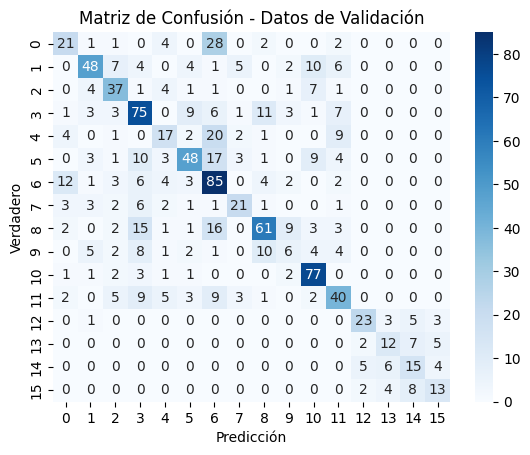

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Archivo de envío guardado como: CNN_submission_64_gray.csv

Entrenando modelo CNN con tamaño de imagen: 64 y Color


C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step - accuracy: 0.1446 - loss: 2.6085 - val_accuracy: 0.3928 - val_loss: 1.8595
Epoch 2/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 105ms/step - accuracy: 0.3457 - loss: 1.8875 - val_accuracy: 0.3872 - val_loss: 1.5814
Epoch 3/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - accuracy: 0.4149 - loss: 1.6290 - val_accuracy: 0.5555 - val_loss: 1.2695
Epoch 4/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 105ms/step - accuracy: 0.4865 - loss: 1.4415 - val_accuracy: 0.6211 - val_loss: 1.1040
Epoch 5/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - accuracy: 0.5829 - loss: 1.2260 - val_accuracy: 0.6451 - val_loss: 1.0117
Epoch 6/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 104ms/step - accuracy: 0.5923 - loss: 1.1919 - val_accuracy: 0.6719 - val_loss: 0.9561
Epoch 7/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.6564 - loss: 1.0101 - val_accuracy: 0.6654 - val_loss: 0.9868
Epoch 8/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.6577 - loss: 0.

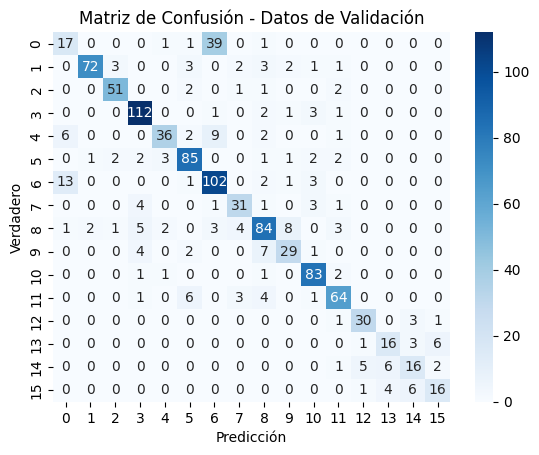

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Archivo de envío guardado como: CNN_submission_64_color.csv

Entrenando modelo CNN con tamaño de imagen: 128 y Blanco y Negro


C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 66s 468ms/step - accuracy: 0.1164 - loss: 2.6830 - val_accuracy: 0.1543 - val_loss: 2.3881
Epoch 2/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 63s 463ms/step - accuracy: 0.1606 - loss: 2.4155 - val_accuracy: 0.1673 - val_loss: 2.3374
Epoch 3/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 63s 465ms/step - accuracy: 0.1763 - loss: 2.3408 - val_accuracy: 0.1885 - val_loss: 2.2836
Epoch 4/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 63s 463ms/step - accuracy: 0.2100 - loss: 2.2474 - val_accuracy: 0.1830 - val_loss: 2.2839
Epoch 5/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 63s 462ms/step - accuracy: 0.2234 - loss: 2.1981 - val_accuracy: 0.1950 - val_loss: 2.2593
Epoch 6/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 63s 464ms/step - accuracy: 0.2605 - loss: 2.1019 - val_accuracy: 0.2440 - val_loss: 2.1911
Epoch 7/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 63s 463ms/step - accuracy: 0.3091 - loss: 1.9831 - val_accuracy: 0.3068 - val_loss: 2.1640
Epoch 8/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 64s 472ms/step - accuracy: 0.3823 - loss: 1

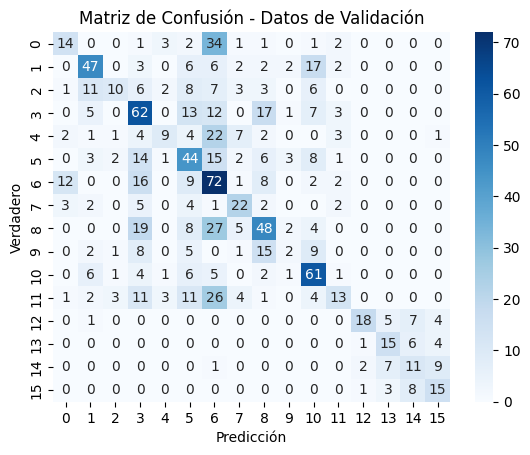

31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step
Archivo de envío guardado como: CNN_submission_128_gray.csv

Entrenando modelo CNN con tamaño de imagen: 128 y Color


C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 64s 448ms/step - accuracy: 0.1266 - loss: 2.8409 - val_accuracy: 0.3512 - val_loss: 1.9255
Epoch 2/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 63s 461ms/step - accuracy: 0.3698 - loss: 1.8721 - val_accuracy: 0.4917 - val_loss: 1.4840
Epoch 3/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 60s 443ms/step - accuracy: 0.4896 - loss: 1.4866 - val_accuracy: 0.5370 - val_loss: 1.3296
Epoch 4/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 61s 446ms/step - accuracy: 0.5227 - loss: 1.3557 - val_accuracy: 0.6072 - val_loss: 1.1457
Epoch 5/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 61s 446ms/step - accuracy: 0.5818 - loss: 1.2029 - val_accuracy: 0.6238 - val_loss: 1.0864
Epoch 6/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 60s 443ms/step - accuracy: 0.6037 - loss: 1.1397 - val_accuracy: 0.6599 - val_loss: 1.0776
Epoch 7/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 61s 451ms/step - accuracy: 0.6435 - loss: 1.0004 - val_accuracy: 0.6728 - val_loss: 0.9725
Epoch 8/40
136/136 ━━━━━━━━━━━━━━━━━━━━ 62s 453ms/step - accuracy: 0.6888 - loss: 0

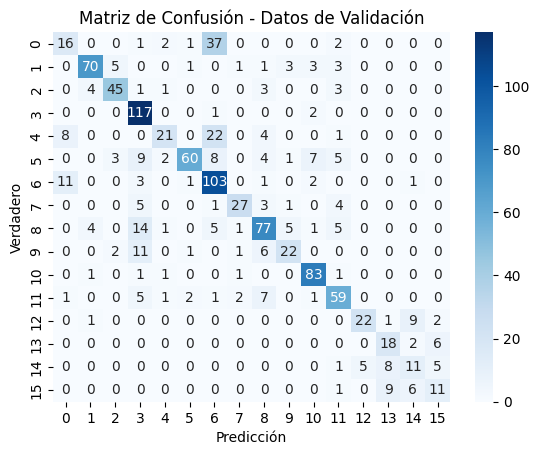

31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step
Archivo de envío guardado como: CNN_submission_128_color.csv


In [42]:
# Ejecutar el entrenamiento y evaluación en diferentes configuraciones
for size in [IMG_SIZE_LR, IMG_SIZE_CNN]:
    for grayscale in [True, False]:  # MODOS_COLOR
        model, labelEncoder, _, _ = trainModel("CNN", size, grayscale)
        predictAndSubmit(model, size, grayscale, labelEncoder, "CNN")

### Mejorando Modelo de Red Convolucional (CNN) con Imágenes en Blanco y Negro.

Considerando que entre las pruebas llevadas a cabo, cambiando el tamaño y el color de las imágenes en las entradas de las redes convolucionales entrenadas, observamos que entre la red que presenta mejores resultados es con las entradas en blanco y negro y de menor dimensión, en este caso la mejor dimensión fue de 64, misma con la que se definió el modelo de regresión logística anteriormente, teniendo esto en cuenta estos hallazgos, se mejorará el modelo para conseguir mejores resultados con base en estas entradas.